In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("training.csv")

In [5]:
data.shape

(65437, 222)

In [7]:
data.head()

,LanguageHaveWorkedWith_Ada,LanguageHaveWorkedWith_Apex,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Bash/Shell (all shells),LanguageHaveWorkedWith_C,LanguageHaveWorkedWith_C#,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_Clojure,LanguageHaveWorkedWith_Cobol,LanguageHaveWorkedWith_Crystal,...,NEWCollabToolsHaveWorkedWith_Spacemacs,NEWCollabToolsHaveWorkedWith_Spyder,NEWCollabToolsHaveWorkedWith_Sublime Text,NEWCollabToolsHaveWorkedWith_VSCodium,NEWCollabToolsHaveWorkedWith_Vim,NEWCollabToolsHaveWorkedWith_Visual Studio,NEWCollabToolsHaveWorkedWith_Visual Studio Code,NEWCollabToolsHaveWorkedWith_WebStorm,NEWCollabToolsHaveWorkedWith_Xcode,DevType
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"Developer, full-stack"
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,"Developer, full-stack"
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Developer Experience
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,"Developer, full-stack"
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,"Developer, full-stack"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 222 entries, LanguageHaveWorkedWith_Ada to DevType
dtypes: int64(221), object(1)
memory usage: 110.8+ MB


In [11]:
data.isna().sum()

LanguageHaveWorkedWith_Ada                         0
LanguageHaveWorkedWith_Apex                        0
LanguageHaveWorkedWith_Assembly                    0
LanguageHaveWorkedWith_Bash/Shell (all shells)     0
LanguageHaveWorkedWith_C                           0
                                                  ..
NEWCollabToolsHaveWorkedWith_Visual Studio         0
NEWCollabToolsHaveWorkedWith_Visual Studio Code    0
NEWCollabToolsHaveWorkedWith_WebStorm              0
NEWCollabToolsHaveWorkedWith_Xcode                 0
DevType                                            0
Length: 222, dtype: int64

In [13]:
data.columns


Index(['LanguageHaveWorkedWith_Ada', 'LanguageHaveWorkedWith_Apex',
       'LanguageHaveWorkedWith_Assembly',
       'LanguageHaveWorkedWith_Bash/Shell (all shells)',
       'LanguageHaveWorkedWith_C', 'LanguageHaveWorkedWith_C#',
       'LanguageHaveWorkedWith_C++', 'LanguageHaveWorkedWith_Clojure',
       'LanguageHaveWorkedWith_Cobol', 'LanguageHaveWorkedWith_Crystal',
       ...
       'NEWCollabToolsHaveWorkedWith_Spacemacs',
       'NEWCollabToolsHaveWorkedWith_Spyder',
       'NEWCollabToolsHaveWorkedWith_Sublime Text',
       'NEWCollabToolsHaveWorkedWith_VSCodium',
       'NEWCollabToolsHaveWorkedWith_Vim',
       'NEWCollabToolsHaveWorkedWith_Visual Studio',
       'NEWCollabToolsHaveWorkedWith_Visual Studio Code',
       'NEWCollabToolsHaveWorkedWith_WebStorm',
       'NEWCollabToolsHaveWorkedWith_Xcode', 'DevType'],
      dtype='object', length=222)

In [15]:
data['DevType'].value_counts()

DevType
Developer, full-stack                            24252
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

In [17]:
y=data['DevType']

In [19]:
X=data.drop(['DevType'],axis=1)
X=X.dropna()
X.isnull().sum()




LanguageHaveWorkedWith_Ada                         0
LanguageHaveWorkedWith_Apex                        0
LanguageHaveWorkedWith_Assembly                    0
LanguageHaveWorkedWith_Bash/Shell (all shells)     0
LanguageHaveWorkedWith_C                           0
                                                  ..
NEWCollabToolsHaveWorkedWith_Vim                   0
NEWCollabToolsHaveWorkedWith_Visual Studio         0
NEWCollabToolsHaveWorkedWith_Visual Studio Code    0
NEWCollabToolsHaveWorkedWith_WebStorm              0
NEWCollabToolsHaveWorkedWith_Xcode                 0
Length: 221, dtype: int64

In [23]:
X_new = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)


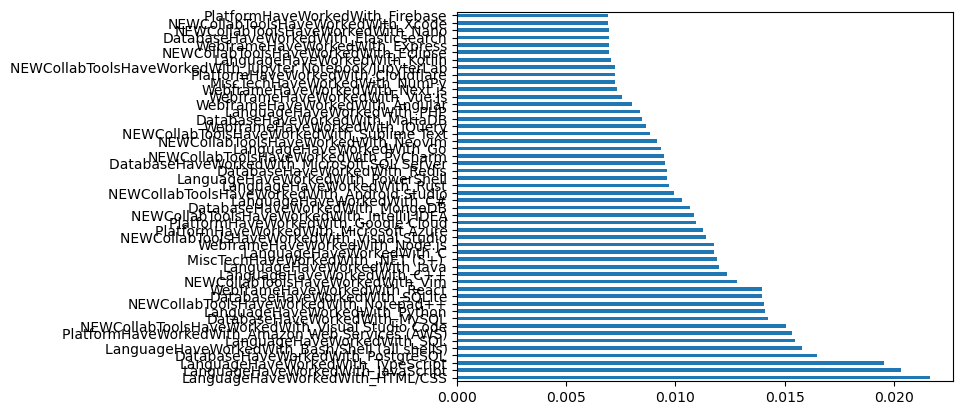

In [25]:
#import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
#Fit the model
model = RandomForestClassifier()
model.fit(X_new,y)
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_new.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)

In [31]:
# prompt: apply feature selection to choose the best 50 features

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=50)
X_selected = selector.fit_transform(X_scaled, y)

# Get the names of the selected features
selected_features = X_new.columns[selector.get_support()]
print(selected_features)

Index(['LanguageHaveWorkedWith_Assembly',
       'LanguageHaveWorkedWith_Bash/Shell (all shells)',
       'LanguageHaveWorkedWith_C', 'LanguageHaveWorkedWith_C++',
       'LanguageHaveWorkedWith_Dart', 'LanguageHaveWorkedWith_Go',
       'LanguageHaveWorkedWith_HTML/CSS', 'LanguageHaveWorkedWith_JavaScript',
       'LanguageHaveWorkedWith_Julia', 'LanguageHaveWorkedWith_Kotlin',
       'LanguageHaveWorkedWith_MATLAB', 'LanguageHaveWorkedWith_Objective-C',
       'LanguageHaveWorkedWith_Python', 'LanguageHaveWorkedWith_R',
       'LanguageHaveWorkedWith_SQL', 'LanguageHaveWorkedWith_Solidity',
       'LanguageHaveWorkedWith_Swift', 'LanguageHaveWorkedWith_TypeScript',
       'DatabaseHaveWorkedWith_Databricks SQL',
       'DatabaseHaveWorkedWith_Elasticsearch',
       'DatabaseHaveWorkedWith_Microsoft SQL Server',
       'DatabaseHaveWorkedWith_Redis', 'DatabaseHaveWorkedWith_Snowflake',
       'PlatformHaveWorkedWith_Databricks', 'PlatformHaveWorkedWith_Firebase',
       'WebframeHaveW

In [35]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)

In [37]:
X_selected.head()

,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Bash/Shell (all shells),LanguageHaveWorkedWith_C,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_Dart,LanguageHaveWorkedWith_Go,LanguageHaveWorkedWith_HTML/CSS,LanguageHaveWorkedWith_JavaScript,LanguageHaveWorkedWith_Julia,LanguageHaveWorkedWith_Kotlin,...,MiscTechHaveWorkedWith_SwiftUI,MiscTechHaveWorkedWith_TensorFlow,MiscTechHaveWorkedWith_Tidyverse,MiscTechHaveWorkedWith_Torch/PyTorch,MiscTechHaveWorkedWith_mlflow,NEWCollabToolsHaveWorkedWith_Android Studio,NEWCollabToolsHaveWorkedWith_IPython,NEWCollabToolsHaveWorkedWith_Jupyter Notebook/JupyterLab,NEWCollabToolsHaveWorkedWith_RStudio,NEWCollabToolsHaveWorkedWith_Xcode
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 44,shuffle=True )

print("x train shape is : ",X_train.shape)
print("x test shape is : ",X_test.shape)
print("y train shape is : ",y_train.shape)
print("y test shape is : ",y_test.shape)


x train shape is :  (52349, 50)
x test shape is :  (13088, 50)
y train shape is :  (52349,)
y test shape is :  (13088,)


In [41]:
# Apply smoten on X_train and y_train

from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize the SMOTEENN object
smote_enn = SMOTEENN(random_state=42)

# Apply the SMOTEENN to balance the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

print("X_train_resampled shape:", X_resampled.shape)
print("y_train_resampled shape:", y_resampled.shape)


Original class distribution: Counter({'Developer, full-stack': 19326, 'Developer, back-end': 7954, 'Student': 4131, 'Developer, front-end': 2694, 'Developer, desktop or enterprise applications': 2038, 'Other (please specify):': 1957, 'Developer, mobile': 1622, 'Developer, embedded applications or devices': 1248, 'Engineering manager': 1021, 'Academic researcher': 990, 'Data engineer': 871, 'DevOps specialist': 828, 'Data scientist or machine learning specialist': 810, 'Research & Development role': 763, 'Senior Executive (C-Suite, VP, etc.)': 682, 'Developer, game or graphics': 557, 'Cloud infrastructure engineer': 512, 'System administrator': 457, 'Developer, AI': 435, 'Developer, QA or test': 429, 'Data or business analyst': 416, 'Project manager': 333, 'Security professional': 295, 'Educator': 288, 'Scientist': 259, 'Engineer, site reliability': 248, 'Product manager': 232, 'Blockchain': 180, 'Developer Experience': 170, 'Hardware Engineer': 152, 'Designer': 144, 'Database administr

In [43]:
X_resampled= X_train
y_resampled= y_train

In [49]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
)
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning  # استيراد ConvergenceWarning
import warnings

# Suppress Warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Single Models
models = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Hyperparameter Grids (Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {},  # No hyperparameters to tune
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, y_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

# Output the Best Models and Their Scores
for name, model in best_models.items():
    print(f"{name}: Best Model - {model}")


Training Logistic Regression...
Logistic Regression: Best Parameters - {'C': 0.1}, Best Score - 0.44936864676107924
Training KNN...
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.3917745765617378
Training Naive Bayes...
Naive Bayes: Best Parameters - {}, Best Score - 0.018873380936467447
Training SVM...


KeyboardInterrupt: 

In [ ]:
# Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")


In [ ]:
# Voting and Stacking (Example - Customize estimators and voting method)
estimators = [('rf', RandomForestClassifier(n_estimators=200)),
 ('xgb', best_models['XGBoost']), ('bagging', best_models['Bagging'])
 ]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # or 'hard'
voting_clf.fit(X_resampled, y_resampled)
best_models['Voting'] = voting_clf

In [ ]:
# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

In [ ]:
# Need to implement stacking alogorithm

from sklearn.ensemble import StackingClassifier

# Define base models and meta-learner
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200)),
    ('xgb', best_models['XGBoost']),
    ('bagging', best_models['Bagging']),
]
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_resampled, y_resampled)

# Add the stacking model to the best_models dictionary
best_models['Stacking'] = stacking_clf

# Evaluate the stacking model on the test set
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
print(f"--- Stacking ---")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


In [51]:
from sklearn.metrics import accuracy_score

# استرجاع النموذج المدرب
logistic_model = best_models['Logistic Regression']

# توقع القيم باستخدام مجموعة التدريب (أو يمكنك استخدام مجموعة اختبار مستقلة إذا كانت لديك)
y_pred = logistic_model.predict(X_scaled)

# حساب الدقة
logistic_accuracy = accuracy_score(y_resampled, y_pred)

print(f"Accuracy of Logistic Regression: {logistic_accuracy}")


Accuracy of Logistic Regression: 0.45227224970868596
